In [93]:
# Importing Required Libraries
import os
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from glob import glob

In [94]:
# Load and Preprocess Images
def load_images_from_folder(folder, img_size=(64, 64)):
    images = []
    for filename in glob(os.path.join(folder, "*.jpg")):  # Assuming images are in .jpg format
        img = cv2.imread(filename)
        if img is not None:
            img = cv2.resize(img, img_size)  # Resize images to 64x64 pixels
            images.append(img)
    return np.array(images)

image_folder = "testdata/fruit"  # Replace with the path to your image folder
images = load_images_from_folder(image_folder)

In [95]:
#Flatten Images to Vectors
flattened_images = images.reshape(len(images), -1)  # Flatten each image to a 1D vector
print(flattened_images)

[[  7   6   8 ... 132 146 174]
 [ 60  56  27 ...  42  52  35]
 [ 71 129 104 ...  64 128  98]
 ...
 [114 124 101 ...  75  86  76]
 [ 48  65  51 ...  22  50  27]
 [  7  16  19 ...  84  98 104]]


In [96]:
#Standardization (Optional)
scaler = StandardScaler()
flattened_images_scaled = scaler.fit_transform(flattened_images)
print(flattened_images_scaled)

[[-1.04817843 -1.16179265 -1.06359942 ...  0.91155804  1.02287018
   1.27674853]
 [-0.35761531 -0.50248332 -0.8052571  ... -0.36915475 -0.39738352
  -0.66619457]
 [-0.21429088  0.4601083   0.24170914 ... -0.05609163  0.7509067
   0.21441993]
 ...
 [ 0.34597731  0.39417736  0.20091825 ...  0.10043994  0.11632526
  -0.09309625]
 [-0.51396922 -0.38380764 -0.47892996 ... -0.6537576  -0.42760169
  -0.77801864]
 [-1.04817843 -1.02993079 -0.91403281 ...  0.22851121  0.29763424
   0.29828798]]


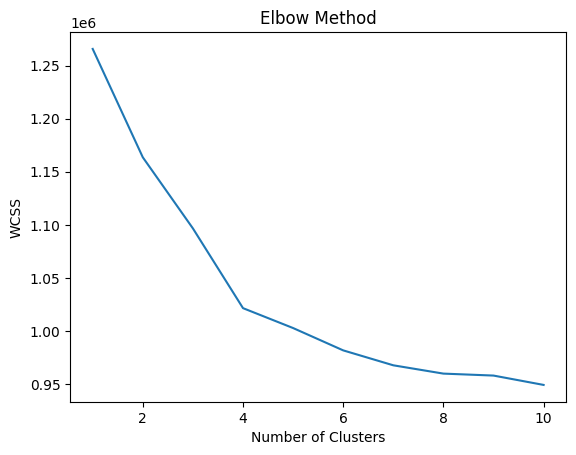

In [97]:
#Determine the Number of Clusters using Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(flattened_images_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [98]:
# Apply K-means Algorithm
k = 4 # Assuming the elbow occurs at k=3
kmeans = KMeans(n_clusters=k, random_state=42)
image_clusters = kmeans.fit_predict(flattened_images_scaled)


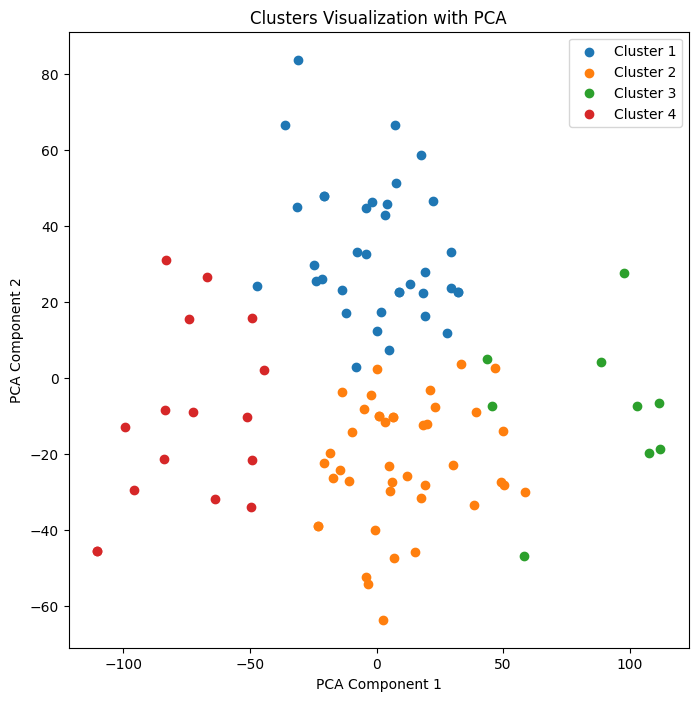

In [99]:
# Visualize the Clusters with PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(flattened_images_scaled)

plt.figure(figsize=(8, 8))
for i in range(k):
    plt.scatter(pca_result[image_clusters == i, 0], pca_result[image_clusters == i, 1], label=f"Cluster {i + 1}")

plt.title("Clusters Visualization with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

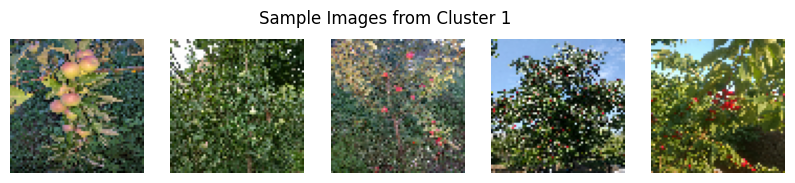

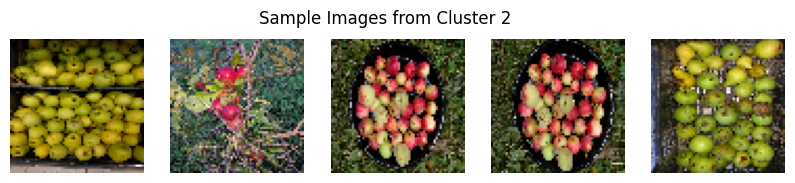

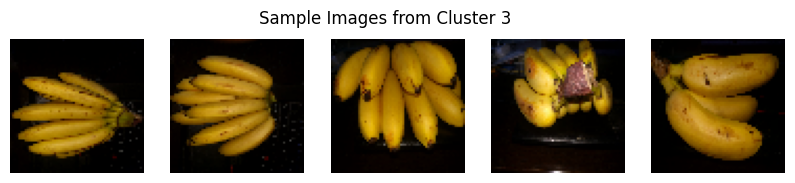

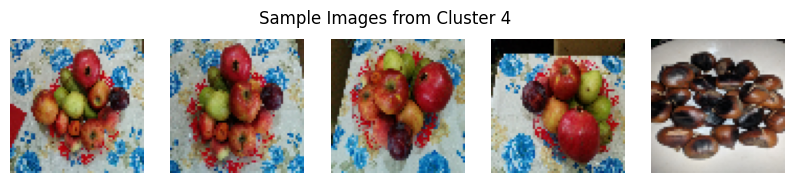

In [100]:
#Display Sample Images from Each Cluster
def display_cluster_images(images, clusters, cluster_num, num_images=5):
    cluster_indices = np.where(clusters == cluster_num)[0]
    selected_images = images[cluster_indices][:num_images]
    
    plt.figure(figsize=(10, 2))
    for i, img in enumerate(selected_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
    plt.suptitle(f"Sample Images from Cluster {cluster_num + 1}")
    plt.show()

for i in range(k):
    display_cluster_images(images, image_clusters, i)

In [101]:
#Evaluate the Clustering Quality
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(flattened_images_scaled, image_clusters)
print(f"Silhouette Score for k={k}: {silhouette_avg:.3f}")

Silhouette Score for k=4: 0.07


In [102]:
# Save the Clustered Images to Separate Folders (Optional)
import shutil

output_folder = "path_to_output_folder"  # Replace with your output folder path

for i in range(k):
    cluster_folder = os.path.join(output_folder, f"Cluster_{i+1}")
    os.makedirs(cluster_folder, exist_ok=True)
    cluster_indices = np.where(image_clusters == i)[0]
    
    for idx in cluster_indices:
        src_file = glob(os.path.join(image_folder, "*.jpg"))[idx]
        shutil.copy(src_file, cluster_folder)
